In [1]:
import re, os
from src.graph_parameters import GraphParameters
from src.graph_stats import GraphStats
from src.dag_generational_comparison import DAG_GenerationalComparison
from src.dag import DAG
from src.node import Node
from src.edge import Edge
from src.utils import load_dag
import numpy as np

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
pkl_stats_re = re.compile('.*P[0-9]*\\\\dag_with_stats.pkl')
data_files = [os.path.join(path, name) for path, _, files in os.walk('.\\data') for name in files]
graph_files = list(filter(pkl_stats_re.match, data_files)) 
print(f"Currently avalible graph with stats files: {graph_files}")

Currently avalible graph with stats files: ['.\\data\\P01\\dag_with_stats.pkl', '.\\data\\P02\\dag_with_stats.pkl', '.\\data\\P03\\dag_with_stats.pkl', '.\\data\\P04\\dag_with_stats.pkl', '.\\data\\P05\\dag_with_stats.pkl', '.\\data\\P06\\dag_with_stats.pkl', '.\\data\\P07\\dag_with_stats.pkl', '.\\data\\P09\\dag_with_stats.pkl', '.\\data\\P10\\dag_with_stats.pkl', '.\\data\\P11\\dag_with_stats.pkl', '.\\data\\P12\\dag_with_stats.pkl', '.\\data\\P13\\dag_with_stats.pkl', '.\\data\\P14\\dag_with_stats.pkl', '.\\data\\P15\\dag_with_stats.pkl', '.\\data\\P16\\dag_with_stats.pkl', '.\\data\\P17\\dag_with_stats.pkl', '.\\data\\P18\\dag_with_stats.pkl', '.\\data\\P19\\dag_with_stats.pkl', '.\\data\\P20\\dag_with_stats.pkl', '.\\data\\P21\\dag_with_stats.pkl', '.\\data\\P23\\dag_with_stats.pkl', '.\\data\\P24\\dag_with_stats.pkl', '.\\data\\P25\\dag_with_stats.pkl', '.\\data\\P26\\dag_with_stats.pkl', '.\\data\\P27\\dag_with_stats.pkl', '.\\data\\P28\\dag_with_stats.pkl', '.\\data\\P30\\dag_w

In [3]:
dags = []

for g in graph_files:
    dag_id = g.split('data\\')[1].split('\\')[0]
    dag = load_dag(g)

    dags.append((dag,dag_id))

In [4]:
exclude = ["P02", "P03", "P11", "P13", "P24", "P25", "P26", "P30", "P32"]
dags = [x for x in dags if x[1] not in exclude]

d:\AnalizaParametrowMorfometrycznychNerki\src\dag_generational_comparison.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axis, xticklabels=self.dag_names)


<Figure size 576x2304 with 0 Axes>

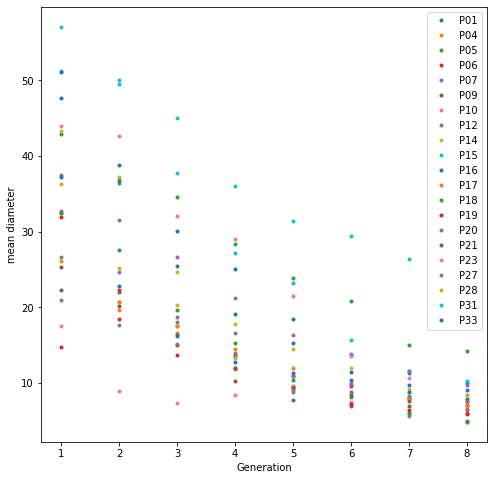

In [5]:
dag_names = [d[1] for d in dags]
dag_graphs = [d[0] for d in dags]

dag_gen_comparison = DAG_GenerationalComparison(dag_graphs, dag_names, 8)
dag_gen_comparison.compare_diameters(False)

,vessels count,total vessel len,vessel avg len,vascular structure vol,vascular network proj area,projection explant area,vascular density,branching points,branching points per pixel,lacunarity
vessels count,1.000,0.988,-0.579,0.198,0.568,0.169,0.699,1.000,0.871,-0.633
total vessel len,0.988,1.000,-0.483,0.276,0.617,0.201,0.741,0.989,0.841,-0.652
vessel avg len,-0.579,-0.483,1.000,0.150,-0.108,0.145,-0.356,-0.576,-0.637,0.438
vascular structure vol,0.198,0.276,0.150,1.000,0.873,0.730,0.665,0.195,-0.214,-0.524
vascular network proj area,0.568,0.617,-0.108,0.873,1.000,0.803,0.766,0.567,0.151,-0.717
projection explant area,0.169,0.201,0.145,0.730,0.803,1.000,0.244,0.169,-0.214,-0.283
vascular density,0.699,0.741,-0.356,0.665,0.766,0.244,1.000,0.697,0.434,-0.866
branching points,1.000,0.989,-0.576,0.195,0.567,0.169,0.697,1.000,0.872,-0.635
branching points per pixel,0.871,0.841,-0.637,-0.214,0.151,-0.214,0.434,0.872,1.000,-0.413
lacunarity,-0.633,-0.652,0.438,-0.524,-0.717,-0.283,-0.866,-0.635,-0.413,1.000


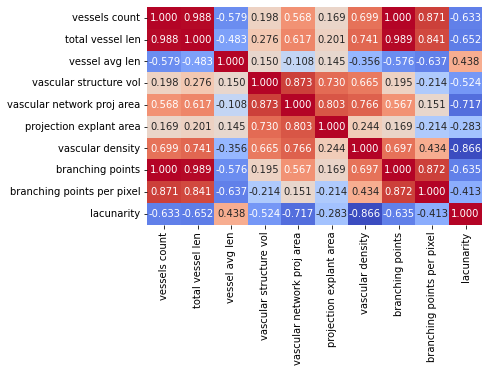

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('results/all_dags_stats.csv')

df.columns = [
    'vessels count', 
    'total vessel len', 
    'vessel avg len', 
    'vascular structure vol', 
    'vascular network proj area',
    'projection explant area',
    'vascular density',
    'branching points',
    'branching points per pixel',
    'lacunarity'
]

fig, ax = plt.subplots()
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.3f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png')

corr = df.dropna().corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)